In [15]:
#
# 必要なモジュールの読み込み
#

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.svar_model import SVAR

from graphviz import Digraph

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定
plt.rcParams['font.size'] = 14 #フォントサイズ
import japanize_matplotlib
import datetime
import calendar
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import random

In [21]:
df_ = pd.read_csv('卒論データ2.csv')
df_ = df_[['Date_VI','VI']]
df_.dropna(inplace = True)
df_['Date_VI'] = pd.to_timedelta(df_['Date_VI'],unit='D')+pd.to_datetime("1899/12/30")
df_.set_index('Date_VI', drop = True, inplace = True)
df_

,VI
Date_VI,
2004-03-31,24.70
2004-04-01,24.04
2004-04-02,22.33
2004-04-05,22.47
2004-04-06,21.45
...,...
2023-11-24,16.87
2023-11-27,17.36
2023-11-28,16.13


In [22]:
def plot_1(df, title):
    
    fig = plt.figure()
    axes = fig.add_subplot()
    
    axes.plot(df, color = 'k')
    axes.set_title(title, size= 30)
    axes.axvline(datetime.datetime(2008,9,15), color="b")
    axes.axvline(datetime.datetime(2020,2,20), color="c")
    axes.axvline(datetime.datetime(2022,2,20), color="g")
    
    axes.text(0.3, 0.01, "リーマン", transform = axes.transAxes, color = 'b')
    axes.text(0.8, 0.01, "コロナ", transform = axes.transAxes, color = 'c')
    axes.text(0.9, 0.01, "ウクライナ", transform = axes.transAxes, color = 'g')

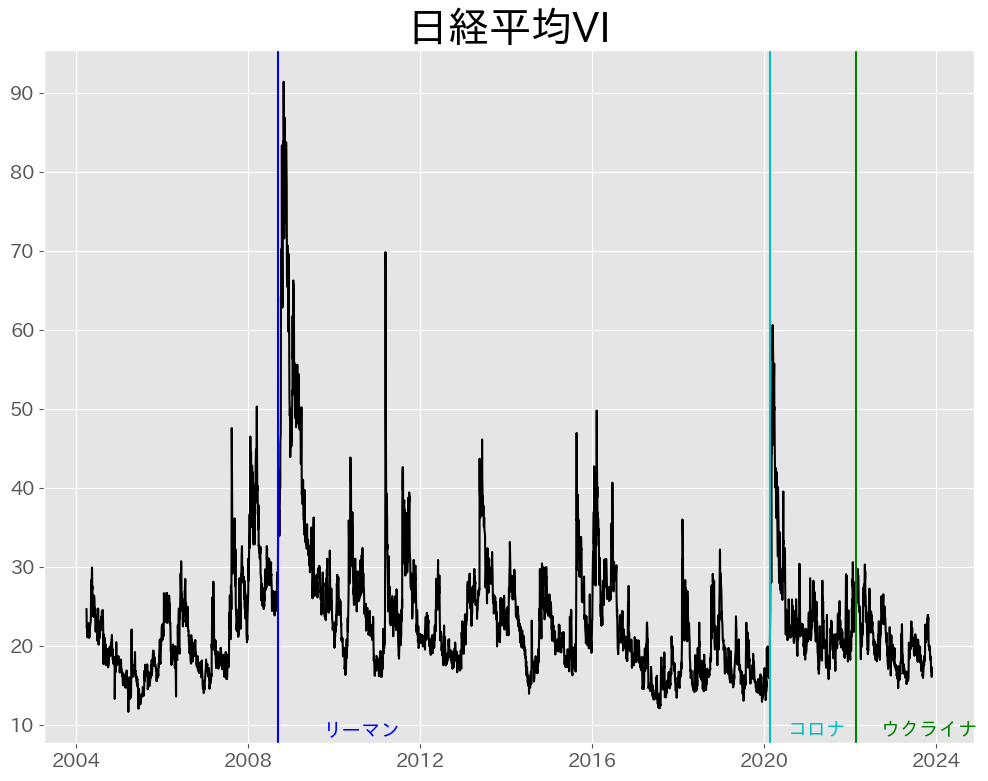

In [24]:
plot_1(df_['VI'],'日経平均VI')